<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/IA/GeneticAlgorithms/AI_GeneticAlgorithm_KnacksackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de la mochila con algoritmos genéticos

Supondremos que tenemos N productos para poner en la mochila, cada producto tiene un peso y un precio. La mochila tiene un peso máximo permitido.
Para esto tenemos una lista con los N pesos (weights) y otra con los N precios (prices).

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

Generar variables aleatorias con vectores de pesos y precios suponiendo que se tienen 10 Productos.

Ejemplo: Se suponen N productos en una mochila con una capacidad W. Por defecto pondremos N=10 y W= 15 kg

In [2]:
#@title Introduzca los valores de N (cantidad de productos), W en kg permitidos para la mochila
N = 10 #@param {type:"integer"}
W = 15 #@param {type:"integer"}



In [3]:
#@title Rango de precios

minprice = 1 #@param {type:"number"}
maxprice = 100 #@param {type:"number"}

Generar los vectores ***weights*** y ***prices*** aleatorios

In [6]:
weights = W*np.random.random_sample((N,))
print(weights)
prices = (maxprice-minprice)*np.random.random_sample((N,))+minprice
print(prices)

[11.82700247  1.59559035 12.72750519  2.79814773  1.6366787  14.69079196
 12.14352153  4.31834054  0.83441383 12.38991132]
[23.17510464  9.28236254 64.29299796 38.0023343  73.28324433 10.32124223
 90.5316082  55.08607412 40.75586153 25.44163517]


## Generar población
Inicializar una población de tamaño N, cromosoma aleatorio binario

In [7]:
#@title Introduzca tamaño de la población, para generar la misma
NP =  30#@param {type:"integer"}

In [13]:
population = [np.random.randint(0,2, N) for _ in range(NP)]
print(population)

[array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0]), array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1]), array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1]), array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1]), array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1]), array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1]), array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0]), array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1]), array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1]), array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]), array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0]), array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0]), array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1]), array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0]), array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0]), array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]), array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1]), array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0]), array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0]), array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1]), array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1]), array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0]), array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1]), array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1]), array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1]), array([0, 0, 0, 0, 1, 0,

In [14]:
def generateFirstPopulation(N, NP):
  population =[np.random.randint(0, 2, N) for _ in range(NP)]
  return population

Hay que definir una función objtivo para evaluar cada uno de los individuos de la población. En este caso lo vamos a hacer para maximizar.

```
def fitnessFunct(x):
....
```



Sea x un individuo o cromosoma, la función en este caso debe cumplir:

Maximize  
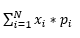

Con la restricción de que 

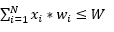


In [15]:
def fitnessFunct(x):
  return sum(x*prices)


In [16]:
def valid(x):
  return 0<sum(x*weights)<=W

In [17]:
fitnessFunct(population[0])

262.1766531232507

In [18]:
V=[i for i,p in enumerate(population) if valid(p)]

In [19]:
V

[17, 18, 21, 25]

Se puede hacer la generación de la población ya con individuos válidos o se puede poner un valor muy pequeño en la función objetiov si no es válido

In [20]:
def fitnessFunct(x):
  return 0.1 if not valid(x) else sum(x*prices)

In [21]:
fitnessFunct(population[22])

0.1

Si queremos generar la población desde un inicio que tenga hijos válidos:

In [22]:
def generateFirstPopulation(N, NP):
  population=[]
  count=0;
  while True:
    ind =np.random.randint(0, 2, N)
    if (valid(ind)):
      population.append(ind)
      count=count+1
    if count==NP:
      return population

## Selección, mutación y cruce

El algoritmo para el algoritmo genético lleva tener un método de selección, uno de mutación y uno de cruce.

Vamos a hacer para selección: Método de la ruleta

para mutación: mutación en un punto

para cruce: Cruce de un punto

### Selección: Método de la ruleta

Ejemplo con 5 individuos

In [23]:
population=generateFirstPopulation(N,NP)
## Ordenar la población según la función objetivo
sorted_population=sorted(population,key=fitnessFunct,reverse=True)
#Para visualizar voy a tomar sólo los 10 primeros
sp=sorted_population[0:5]
of=[fitnessFunct(s) for s in sp]
probability=of/sum(of)
accumulatedProb=np.cumsum(probability)
accumulatedProb

array([0.23716226, 0.432678  , 0.62517616, 0.81767432, 1.        ])

In [24]:
df = pd.DataFrame(list(zip(sp, of,probability,accumulatedProb)),
               columns =['individual', 'fitnessFunct','probability','accumulated probability'])

In [25]:
df

,individual,fitnessFunct,probability,accumulated probability
0,"[0, 1, 0, 1, 1, 0, 0, 1, 1, 0]",216.409877,0.237162,0.237162
1,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 0]",178.407543,0.195516,0.432678
2,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0]",175.654015,0.192498,0.625176
3,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0]",175.654015,0.192498,0.817674
4,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 0]",166.371653,0.182326,1.000000


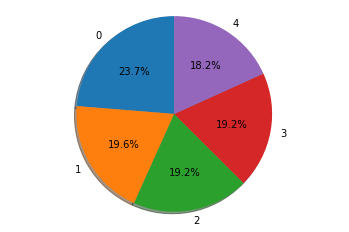

In [26]:
import matplotlib.pyplot as plt

labels = np.arange(len(probability))

fig1, ax1 = plt.subplots()
ax1.pie(probability, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [27]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=labels, values=of, textinfo='label+percent')])
fig.show()

Método del método de la ruleta, para poder hacer la selección

In [29]:
def roulette(population):
  of=[fitnessFunct(s) for s in population]
  probability=of/sum(of)
  accumulatedProb=np.cumsum(probability)
  return accumulatedProb

In [30]:
accumulatedProb=roulette(population)

In [31]:
def selection(population):
  nr=np.random.uniform()
  for i,p in enumerate(accumulatedProb):
    if nr<p:
      return i, population[i]

In [32]:
selection(population)[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

Aunque se puede usar también la función de numpy *np.random.choice* que selecciona de una lista bajo una probabilidad, o sea, el mismo sentido de selección por ruleta.

In [33]:
population=generateFirstPopulation(N,NP)
of=[fitnessFunct(s) for s in population]
probability=of/sum(of)
indexPop=np.arange(len(population))
np.random.choice(indexPop.tolist(),1,p=probability.tolist())

array([5])

### Cruce: Cruce de un punto (one point crossover)

In [36]:
## Generar punto de corte
cp=np.random.randint(1,len(sp[0])-1)
cp

5

In [37]:
print(population[0])
print(population[1])

[0 1 0 1 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 1 0]


In [38]:
child1=np.concatenate((population[0][0:cp+1],population[1][cp+1:len(population[1])]), axis=0)
child1

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [39]:
def crossover(ind1, ind2):
  cp=np.random.randint(1,len(sp[0])-1)
  ## Create new children
  child1=np.concatenate((ind1[0:cp+1],ind2[cp+1:len(ind2)]))
  child2=np.concatenate((ind2[0:cp+1],ind1[cp+1:len(ind1)]))
  return child1,child2

In [ ]:
ind1=selection(population)[1]
ind2=selection(population)[1]
print(ind1)
print(ind2)

[0 0 1 0 0 0 1 0 0 0]
[0 0 0 0 0 1 1 0 0 1]


In [ ]:
crossover(ind1,ind2)

(array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1]), array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0]))

### Mutación: Mutación de un bit

In [41]:
cp=np.random.randint(0,len(sp[0])-1)
print(cp)
ind=population[0]
print(ind)
child=np.copy(ind)
child[cp]=not child[cp]
print(child)

1
[0 1 0 1 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 1 0]


In [42]:
def mutate(ind):
  cp=np.random.randint(0,len(sp[0])-1)
  child=np.copy(ind)
  child[cp]=not child[cp]
  return child

## Método de algoritmo genético

Este algoritmo genético parará en un número de generaciones determinado, se guardará el mejor individuo de cada población y se devolverá el mejor de todos.

In [43]:
#@title Introduzca la cantidad de generaciones para el algoritmo
generations = 300 #@param {type:"integer"}

In [44]:
#@title Texto de título predeterminado
mutation_probability = 0.1 #@param {type:"number"}
crossover_probability = 0.9 #@param {type:"number"}


In [52]:
def geneticAlgorithm(sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability):
  #Genera la poblacion con una cantidad de cromosomas de individual y una poblacion de population
  population=generateFirstPopulation(sizeIndividual, sizePopulation)
  #Genera la probabilidad acumulada (sin ordenar) para toda la poblacion
  accumulatedProb=roulette(population)
  print("population:",population)
  print("accumulated Prob:",accumulatedProb)
  of=[fitnessFunct(s) for s in population]
  sorted_population=sorted(population,key=fitnessFunct,reverse=True)
  bestIndividual=[sorted_population[0]] # Lista de los mejores cromosomas
  for i in range(generations):
    #Generar la nueva población
    nextPopulation=[]
    count=0
    while True: # para crear la población cuando tengamos NP individuos
      # Hacemos selección de dos individuos y cruce si es posible
      ind1=selection(population)[1]
      ind2=selection(population)[1]
      crossProb=nr=np.random.uniform()
      if crossProb<crossover_probability:
        child1,child2=crossover(ind1,ind2)
        if valid(child1):
          nextPopulation.append(child1)
        if valid(child2):
          nextPopulation.append(child2)
      else:
        nextPopulation.append(ind1)
        nextPopulation.append(ind2)
      # Hacemos selección de un individuo y mutación si es posible
      mutProb=nr=np.random.uniform()
      ind=selection(population)[1]
      if mutProb<mutation_probability:
        child=mutate(ind)
        if valid(child):
          nextPopulation.append(child)
      else:
        nextPopulation.append(ind)
      if len(nextPopulation)>=sizePopulation:
        nextPopulation=nextPopulation[0:sizePopulation]
        break;
    
    accumulatedProb=roulette(nextPopulation)
    sorted_population=sorted(nextPopulation,key=fitnessFunct,reverse=True)
    bestIndividual.append(sorted_population[0]) 
    population=nextPopulation
  sortedBest=sorted(bestIndividual,key=fitnessFunct,reverse=True) 
  return bestIndividual,sortedBest[0]


In [50]:
sizeIndividual=N
sizePopulation=NP
bestList,bestInd=geneticAlgorithm(sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability)
bestInd

population: [array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0]), array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0]), array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0]), array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0]), array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0]), array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0]), array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0]), array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0]), array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0]), array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0]), array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0]), array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0,

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [51]:
iteration=np.arange(0,len(bestList))
fitnessValue=[fitnessFunct(x) for x in bestList]
df = pd.DataFrame(list(zip(iteration,fitnessValue)),
               columns =['iteration', 'fitness'])
fig = px.line(df, x="iteration", y="fitness")
fig.show()

In [ ]:
print(weights)
print(prices)

[ 0.15194526  3.1928494   4.16207629  7.3690238  14.41463845  1.65537704
 10.12640411  6.59615805  4.58713159  1.18966927]
[83.56766084 71.16420874 65.27958281 63.2319075  41.00785337 41.42194375
 66.20960513 69.96913063 32.76405652 46.18017505]


In [ ]:
print(fitnessFunct([1, 0, 0, 0, 1, 0, 0, 0, 1, 1]))
print(fitnessFunct(bestInd))


0.1
340.3776277029632


## Clase agrupando todo los métodos anteriores, para generalizar para problemas con individuos binarios.

In [ ]:
class Genetic_Algorithm ():
  def __init__(self, sizeIndividual, sizePopulation=100, generations=400, mutation_probability=0.1, crossover_probability=0.9):
    self.sizeIndividual= sizeIndividual
    self.sizePopulation = sizePopulation
    self.generations = generations
    self.mutation_probability=mutation_probability
    self.crossover_probability=crossover_probability

  def fitnessFunct(self,x):
    #return sum(x*prices)
    pass

  def valid(self, x):
   #return 0<sum(x*weights)<=W
   return True

  def generateFirstPopulation(self):
    population=[]
    count=0;
    while True:
      ind =np.random.randint(0, 2, sizeIndividual)
      if (self.valid(ind)):
        population.append(ind)
        count=count+1
      if count==sizePopulation:
        return population

  def roulette(self,population):
    of=[self.fitnessFunct(s) for s in population]
    probability=of/sum(of)
    accumulatedProb=np.cumsum(probability)
    return accumulatedProb 

  def selection(self, population, accumulatedProb):
    nr=np.random.uniform()
    for i,p in enumerate(accumulatedProb):
      if nr<p:
        return population[i]

  def crossover(self,ind1, ind2):
    cp=np.random.randint(1,len(ind1)-1)
    ## Create new children
    child1=np.concatenate((ind1[0:cp+1],ind2[cp+1:len(ind2)]))
    child2=np.concatenate((ind2[0:cp+1],ind1[cp+1:len(ind1)]))
    return child1,child2

  def mutate(self,ind):
    cp=np.random.randint(0,len(ind)-1)
    child=np.copy(ind)
    child[cp]=not child[cp]
    return child

  def geneticAlgorithm(self):
    population=self.generateFirstPopulation()
    accumulatedProb=self.roulette(population)
    self.bestIndividual=[population[0]] # Lista de mejores individuos de cada población
    for i in range(self.generations):
      #Generar la nueva población
      nextPopulation=[]
      count=0
      while True: # para crear la población cuando tengamos NP individuos
        # Hacemos selección de dos individuos y cruce si es posible
        ind1=self.selection(population, accumulatedProb)
        ind2=self.selection(population, accumulatedProb)
        crossProb=nr=np.random.uniform()
        if crossProb<self.crossover_probability:
          child1,child2=self.crossover(ind1,ind2)
          if self.valid(child1):
            nextPopulation.append(child1)
          if self.valid(child2):
            nextPopulation.append(child2)
        else:
          nextPopulation.append(ind1)
          nextPopulation.append(ind2)
        # Hacemos selección de un individuo y mutación si es posible
        mutProb=nr=np.random.uniform()
        ind=self.selection(population, accumulatedProb)
        if mutProb<self.mutation_probability:
          child=self.mutate(ind)
          if self.valid(child):
            nextPopulation.append(child)
        else:
          nextPopulation.append(ind)
        if len(nextPopulation)>=sizePopulation:
          nextPopulation=nextPopulation[0:sizePopulation]
          break;
      
      accumulatedProb=self.roulette(nextPopulation)
      sorted_population=sorted(nextPopulation,key=fitnessFunct,reverse=True)
      self.bestIndividual.append(sorted_population[0])
      population=nextPopulation
    sortedBest=sorted(self.bestIndividual,key=self.fitnessFunct,reverse=True)
    return sortedBest[0],self.fitnessFunct(sortedBest[0])
    

In [ ]:
class GA_KnacksackProblem(Genetic_Algorithm):
  def __init__(self, weights, prices, sizeKnacksack, sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability):
    super(GA_KnacksackProblem, self).__init__(sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability)
    self.weights=weights
    self.prices=prices
    self.sizeKnacksack=sizeKnacksack

  def fitnessFunct(self,x):
    return sum(x*self.prices)

  def valid(self,x):
    return 0<sum(x*self.weights)<=self.sizeKnacksack

In [ ]:
KP=GA_KnacksackProblem(weights, prices, W, sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability)

In [ ]:
solution, f=KP.geneticAlgorithm()
print(solution, f)

[1 1 1 0 0 1 0 0 1 1] 340.3776277029632


In [ ]:
iteration=np.arange(0,len(KP.bestIndividual))
fitnessValue=[KP.fitnessFunct(x) for x in KP.bestIndividual]
df = pd.DataFrame(list(zip(iteration,fitnessValue)),
               columns =['iteration', 'fitness'])
fig = px.line(df, x="iteration", y="fitness")
fig.show()

Ejecutar el método con los parámetros seleccionados


In [ ]:
#@Ejecutar el problema de la mochila con los parámetros seleccionados
sizeKnacksack = 15 #@param {type:"integer"}
sizeIndividual = 10 #@param {type:"integer"}
minprice = 1 #@param {type:"number"}
maxprice = 100 #@param {type:"number"}

sizePopulation = 30 #@param {type:"integer"}
generations = 300 #@param {type:"integer"}
mutation_probability = 0.2 #@param {type:"number"}
crossover_probability = 0.9 #@param {type:"number"}

W=sizeKnacksack
N=sizeIndividual
weights = W*np.random.random_sample((N,))
prices = (maxprice-minprice)*np.random.random_sample((N,))+minprice


from IPython.display import Markdown, display
title='Suponiendo un problema donde tenemos una mochila con una capacidad de '+ str(sizeKnacksack) + 'Kg'
display(Markdown('**{}**'.format(title)))
display(Markdown("**Los siguientes productos:**"))
print(['p'+str(i) for i in range(N)])
display(Markdown("**Con los siguientes pesos respectivos:**"))
print(weights)
display(Markdown("**Y los siguientes precios:**"))
print(prices)
KP=GA_KnacksackProblem(weights, prices, sizeKnacksack, sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability)
solution, f=KP.geneticAlgorithm()
resp='Para una mejor de ganancia de: ' +'{:.2f}'.format(f)
display(Markdown('**{}**'.format(resp)))
display(Markdown("**La mejor combinación es llevar los productos:**"))
print(['p'+str(i) for i,s in enumerate(solution) if s])
#display(Markdown((solution, f)

**Suponiendo un problema donde tenemos una mochila con una capacidad de 15Kg**

**Los siguientes productos:**

['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']


**Con los siguientes pesos respectivos:**

[ 4.79814911 13.26741688  3.16290048  2.31096101 11.96595439  7.9769013
  4.5160947   9.35114589  2.90183396 14.95798931]


**Y los siguientes precios:**

[35.18303927 33.04937025 98.23156886 88.76395565 19.80693391 53.81731655
  9.43835903 45.36768645 49.51589802 92.55931947]


**Para una mejor de ganancia de: 271.69**

**La mejor combinación es llevar los productos:**

['p0', 'p2', 'p3', 'p8']
